<h1><i>Priyanshu Chaurasiya</i></h1>


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow

In [ ]:
# Upload the image
uploaded = files.upload()

Saving gutters1.JPG to gutters1.JPG
Saving gutters2.JPG to gutters2.JPG
Saving gutters3.JPG to gutters3.JPG


Enter image number:2


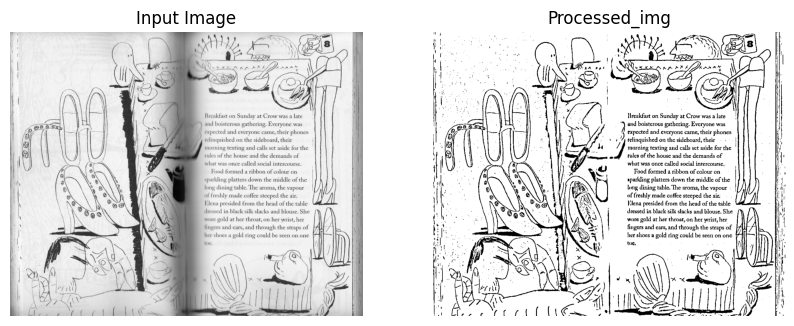

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

def shadow_remove(img_path):
    # Apply shadow removal logic to single plane
    dilated_img = cv2.dilate(img, np.ones((5, 5), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 31)
    diff_img = 255 - cv2.absdiff(img, bg_img)
    norm_img = cv2.normalize(diff_img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

    return norm_img

p=int(input("Enter image number:"))
if(p==1):
  input_img = "gutters1.JPG"
elif(p==2):
  input_img = "gutters2.JPG"
elif(p==3):
  input_img = "gutters3.JPG"

img = cv2.imread(input_img, cv2.IMREAD_GRAYSCALE)  # reading in grayscale mode
output_img = shadow_remove(img)

# Apply Gaussian thresholding to the output image
block_size = 31
constant = 10
gaussian_thresh = cv2.adaptiveThreshold(output_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, constant)

cv2.imwrite('processed_img.jpg', gaussian_thresh)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(img, cmap='gray')
ax1.set_title('Input Image')
ax1.axis('off')
ax2.imshow(gaussian_thresh, cmap='gray')
ax2.set_title('Processed_img')
ax2.axis('off')
plt.show()
